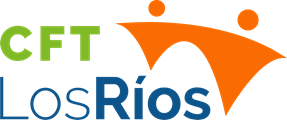

## UNIDAD IV: ESTADISTICA INFERENCIAL
#### PROFESOR: DIEGO MIRANDA
#### DATA SCIENTIST
#### Modelo de regresion lineal simple y multiple con la libreria statsmodel

### Modelo de regresion lineal simple

In [1]:
import pandas as pd

data = pd.read_csv("Advertising.csv")

data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

lm = smf.ols(formula="Sales~TV", data = data).fit()

lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

#### El intercepto representa el valor de la variable independiente cuando es igual a 0
* El modelo lineal predictivo seria Sales = 7.032594 + 0.047537 * TV

In [3]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [4]:
lm.rsquared

0.611875050850071

In [5]:
lm.rsquared_adj

0.6099148238341623

In [6]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.47e-42
Time:                        14:25:22   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
prediccion = lm.predict(pd.DataFrame(data["TV"]))
prediccion

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

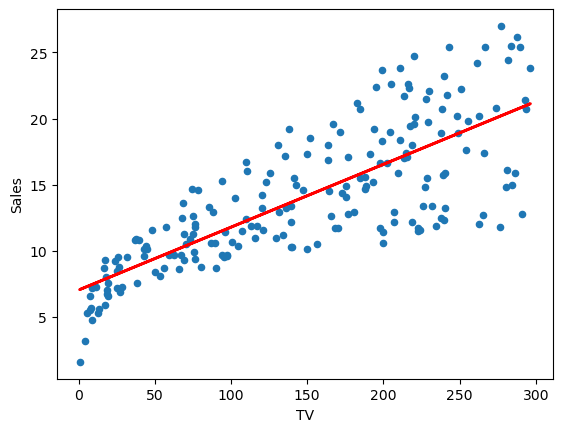

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

data.plot(kind="scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), prediccion, c='red', linewidth=2)

In [9]:
data["predicciones"] = 7.032594 + 0.047537*data["TV"]

data["RSE"] = (data["Sales"]-data["predicciones"])**2

data.head()

,TV,Radio,Newspaper,Sales,predicciones,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528
2,17.2,45.9,69.3,9.3,7.850230,2.101832
3,151.5,41.3,58.5,18.5,14.234450,18.194921
4,180.8,10.8,58.4,12.9,15.627284,7.438076


In [10]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [11]:
import numpy as np

RSE = np.sqrt(SSD/len(data)-2)
RSE

2.917645098268167

In [12]:
sales_m = np.mean(data["Sales"])
sales_m

14.0225

In [13]:
sales_median = np.median(data["Sales"])
sales_median

12.9

In [14]:
error = RSE/sales_m
error

0.20806882497900994

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

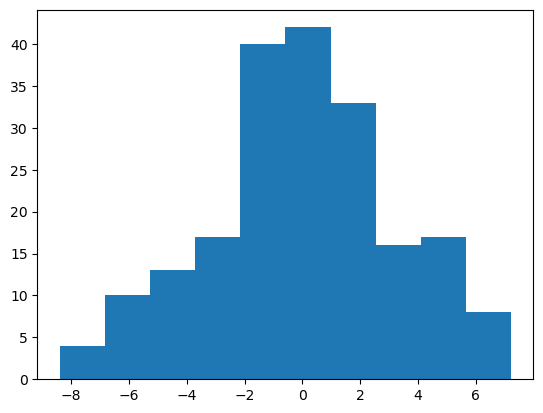

In [15]:
plt.hist((data["Sales"]-data["predicciones"]))

### Modelo de regresion lineal multiple
* Modelo de regresion lineal multiple utilizando las variables independientes TV y Newspaper

In [16]:
lm2 =  smf.ols(formula="Sales~TV+Newspaper", data=data).fit()

lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [17]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [18]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.95e-45
Time:                        14:25:24   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
prediccion2 = lm2.predict(data[["TV", "Newspaper"]])
prediccion2

0      19.626901
1       9.856348
2       9.646055
3      15.467318
4      16.837102
         ...    
195     8.176802
196    10.551220
197    14.359467
198    22.003458
199    17.045429
Length: 200, dtype: float64

In [20]:
data["prediccion2"] = prediccion2
data.head()

,TV,Radio,Newspaper,Sales,predicciones,RSE,prediccion2
0,230.1,37.8,69.2,22.1,17.970858,17.049816,19.626901
1,44.5,39.3,45.1,10.4,9.147990,1.567528,9.856348
2,17.2,45.9,69.3,9.3,7.850230,2.101832,9.646055
3,151.5,41.3,58.5,18.5,14.234450,18.194921,15.467318
4,180.8,10.8,58.4,12.9,15.627284,7.438076,16.837102


In [21]:
data["RSE2"] = (data["Sales"]-prediccion2)**2

data.head()

,TV,Radio,Newspaper,Sales,predicciones,RSE,prediccion2,RSE2
0,230.1,37.8,69.2,22.1,17.970858,17.049816,19.626901,6.116216
1,44.5,39.3,45.1,10.4,9.147990,1.567528,9.856348,0.295557
2,17.2,45.9,69.3,9.3,7.850230,2.101832,9.646055,0.119754
3,151.5,41.3,58.5,18.5,14.234450,18.194921,15.467318,9.197159
4,180.8,10.8,58.4,12.9,15.627284,7.438076,16.837102,15.500771


In [22]:
SSD2 = sum((data["Sales"]-prediccion2)**2)
SSD2

1918.5618118968264

In [23]:
RSE2 = np.sqrt(SSD/len(data)-2-1)
RSE2

2.740921910498047

In [24]:
error2 = RSE2/sales_m
error2

0.1954659946869707

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

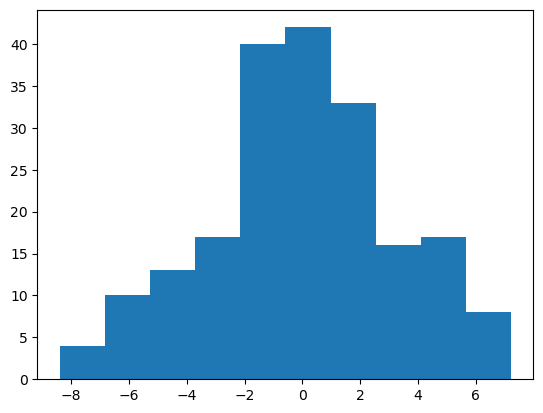

In [25]:
plt.hist((data["Sales"]-data["predicciones"]))

### Modelo de regresion lineal multiple
* Modelo de regresion lineal multiple utilizando las variables independientes TV, Newspaper y Radio

In [26]:
lm3 =  smf.ols(formula="Sales~TV+Newspaper+Radio", data=data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.58e-96
Time:                        14:25:24   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
lm3.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Newspaper    8.599151e-01
Radio        1.505339e-54
dtype: float64

In [28]:
prediccion3 = lm3.predict(data[["TV", "Newspaper", "Radio"]])
prediccion3

0      20.523974
1      12.337855
2      12.307671
3      17.597830
4      13.188672
         ...    
195     5.370342
196     8.165312
197    12.785921
198    23.767321
199    15.173196
Length: 200, dtype: float64

In [29]:
data["prediccion2"] = prediccion2
data.head()

,TV,Radio,Newspaper,Sales,predicciones,RSE,prediccion2,RSE2
0,230.1,37.8,69.2,22.1,17.970858,17.049816,19.626901,6.116216
1,44.5,39.3,45.1,10.4,9.147990,1.567528,9.856348,0.295557
2,17.2,45.9,69.3,9.3,7.850230,2.101832,9.646055,0.119754
3,151.5,41.3,58.5,18.5,14.234450,18.194921,15.467318,9.197159
4,180.8,10.8,58.4,12.9,15.627284,7.438076,16.837102,15.500771


In [30]:
data["prediccion3"] = prediccion3
data.head()

,TV,Radio,Newspaper,Sales,predicciones,RSE,prediccion2,RSE2,prediccion3
0,230.1,37.8,69.2,22.1,17.970858,17.049816,19.626901,6.116216,20.523974
1,44.5,39.3,45.1,10.4,9.147990,1.567528,9.856348,0.295557,12.337855
2,17.2,45.9,69.3,9.3,7.850230,2.101832,9.646055,0.119754,12.307671
3,151.5,41.3,58.5,18.5,14.234450,18.194921,15.467318,9.197159,17.597830
4,180.8,10.8,58.4,12.9,15.627284,7.438076,16.837102,15.500771,13.188672


In [31]:
data["RSE3"] = (data["Sales"]-prediccion3)**2

data.head()

,TV,Radio,Newspaper,Sales,predicciones,RSE,prediccion2,RSE2,prediccion3,RSE3
0,230.1,37.8,69.2,22.1,17.970858,17.049816,19.626901,6.116216,20.523974,2.483857
1,44.5,39.3,45.1,10.4,9.147990,1.567528,9.856348,0.295557,12.337855,3.755281
2,17.2,45.9,69.3,9.3,7.850230,2.101832,9.646055,0.119754,12.307671,9.046084
3,151.5,41.3,58.5,18.5,14.234450,18.194921,15.467318,9.197159,17.597830,0.813912
4,180.8,10.8,58.4,12.9,15.627284,7.438076,16.837102,15.500771,13.188672,0.083331


In [32]:
RSE3 = np.sqrt(SSD/len(data)-3-1)
RSE3

2.5519899920352866

In [33]:
error3 = RSE3/sales_m
error3

0.18199251146623543

(array([ 1.,  0.,  0.,  3.,  7., 19., 24., 61., 62., 23.]),
 array([-8.8276871 , -7.66199613, -6.49630516, -5.33061419, -4.16492322,
        -2.99923225, -1.83354128, -0.66785031,  0.49784066,  1.66353163,
         2.8292226 ]),
 <BarContainer object of 10 artists>)

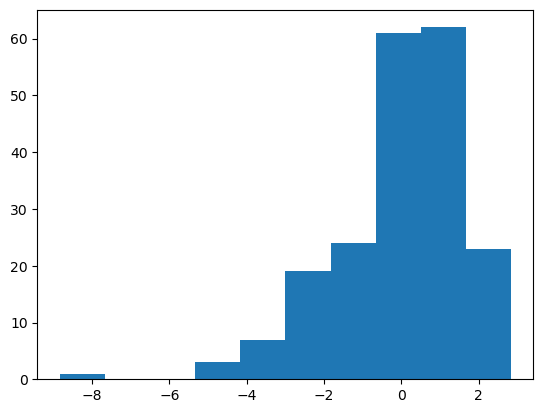

In [34]:
plt.hist((data["Sales"]-data["prediccion3"]))

### Multicolinealidad
Factor inflacion de la varianza
* VIF = 1: Las variables no estan correlacionadas
* VIF < 5: Las variables tienen una correlacion moderada y se deben quedar en el modelo
* VIF > 5: Las variables estan altamente correlacionada y deben salir del modelo

In [35]:
# Newspaper ~ TV + Radio -> R2 VIF = 1/(1-R2)
lm_n = smf.ols(formula="Newspaper~TV+Radio", data=data).fit()
rsquared_n = lm_n.rsquared
VIF_n = 1/(1-rsquared_n)
VIF_n

1.1451873787239288

In [36]:
# TV ~ Newspaper + Radio -> R2 VIF = 1/(1-R2)
lm_tv = smf.ols(formula="TV~Newspaper+Radio", data=data).fit()
rsquared_tv = lm_tv.rsquared
VIF_tv = 1/(1-rsquared_tv)
VIF_tv

1.0046107849396502

In [37]:
# Radio ~ Newspaper + TV -> R2 VIF = 1/(1-R2)
lm_r = smf.ols(formula="Radio~Newspaper+TV", data=data).fit()
rsquared_r = lm_r.rsquared
VIF_r = 1/(1-rsquared_r)
VIF_r

1.1449519171055353